# Metis Live Online Introduction to Data Science Final Project
 Sustainable Energy for All
 
 SE4ALL database, IEA and World Bank

 by Kelly Nelson 

In [128]:
from __future__ import print_function
import pandas as pd
import numpy as np
import scipy.stats as stats

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
print ("Pandas version:", pd.__version__)
print ("Numpy version:" , np.__version__)

Pandas version: 0.20.3
Numpy version: 1.13.3


In [130]:
# importing data from the SE4ALL database published by The World Bank

energydata = pd.read_csv("C:/Users/obrie/Documents/SE4ALL_csv/SE4ALLData.csv")

In [131]:
# look at data's shape to determine # of rows & columns
energydata.shape

(2849, 30)

In [243]:
energydata.head(11)

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1990,1991,1992,1993,1994,1995,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,BES Islands,BES,Access to Clean Fuels and Technologies for coo...,2.1_ACCESS.CFT.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BES Islands,BES,Access to electricity (% of rural population w...,1.2_ACCESS.ELECTRICITY.RURAL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BES Islands,BES,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BES Islands,BES,Access to electricity (% of urban population w...,1.3_ACCESS.ELECTRICITY.URBAN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BES Islands,BES,Energy intensity level of primary energy (MJ/2...,6.1_PRIMARY.ENERGY.INTENSITY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BES Islands,BES,Renewable electricity output (GWh),4.1.2_REN.ELECTRICITY.OUTPUT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,2.200000
6,BES Islands,BES,Renewable electricity share of total electrici...,4.1_SHARE.RE.IN.ELECTRICITY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.770000
7,BES Islands,BES,Renewable energy consumption (TJ),3.1_RE.CONSUMPTION,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.863496,3.863496,9.734885
8,BES Islands,BES,Renewable energy share of TFEC (%),2.1_SHARE.TOTAL.RE.IN.TFEC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108964,0.107077,0.269480
9,BES Islands,BES,Total electricity output (GWh),4.1.1_TOTAL.ELECTRICITY.OUTPUT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.600000,121.900000,124.100000


In [133]:
# It looks like there are a lot of null values - let's check how many for each year
energydata.isnull().sum()

Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
1990               984
1991               946
1992               898
1993               882
1994               876
1995               845
1996               838
1997               830
1998               823
1999               814
2000               583
2001               566
2002               540
2003               538
2004               532
2005               519
2006               516
2007               503
2008               501
2009               499
2010               495
2011               493
2012               475
2013               475
2014               475
Unnamed: 29       2849
dtype: int64

In [134]:
energydata.columns

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1990', u'1991', u'1992', u'1993', u'1994', u'1995', u'1996', u'1997',
       u'1998', u'1999', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005',
       u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013',
       u'2014', u'Unnamed: 29'],
      dtype='object')

In [135]:
energydata.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
Unnamed: 29       float64
dtype: object

In [136]:
energydata['Country Name'].unique()

array(['BES Islands', 'Nauru', 'Niue', 'Wallis and Futuna',
       'Caucasian and Central Asia', 'Caucasus and Central Asia',
       'Eastern Asia (including Japan)',
       'Eastern Asia (not including Japan)', 'Eastern Europe', 'Europe',
       'High income', 'High income: nonOECD', 'High income: OECD',
       'Latin America and Caribbean', 'Low & middle income', 'Low income',
       'Lower middle income', 'Middle income', 'Northern America',
       'Not classified', 'Nothern America', 'Oceania',
       'Oceania (not including Australia and New Zealand)',
       'South Eastern Asia', 'Southern Asia', 'Sub-Saharan Africa',
       'Upper middle income', 'Western Asia', 'World', 'Afghanistan',
       'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'B

In [137]:
energydata['Indicator Name'].unique()

array([ 'Access to Clean Fuels and Technologies for cooking (% of total population)',
       'Access to electricity (% of rural population with access)',
       'Access to electricity (% of total population)',
       'Access to electricity (% of urban population with access)',
       'Energy intensity level of primary energy (MJ/2011 USD PPP)',
       'Renewable electricity output (GWh)',
       'Renewable electricity share of total electricity output (%)',
       'Renewable energy consumption (TJ)',
       'Renewable energy share of TFEC (%)',
       'Total electricity output (GWh)',
       'Total final energy consumption (TFEC) (TJ)'], dtype=object)

In [138]:
energydata['Country Name'].nunique()

259

In [139]:
energydata['Unnamed: 29'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 29, dtype: float64

In [140]:
# removing blank column
print ("Columns before removal:", energydata.columns)
del energydata['Unnamed: 29']
print ("Columns after removal: ", energydata.columns)

Columns before removal: Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1990', u'1991', u'1992', u'1993', u'1994', u'1995', u'1996', u'1997',
       u'1998', u'1999', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005',
       u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013',
       u'2014', u'Unnamed: 29'],
      dtype='object')
Columns after removal:  Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1990', u'1991', u'1992', u'1993', u'1994', u'1995', u'1996', u'1997',
       u'1998', u'1999', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005',
       u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013',
       u'2014'],
      dtype='object')


In [141]:
energydata['Indicator Name'].describe()

count                                                  2849
unique                                                   11
top       Access to electricity (% of urban population w...
freq                                                    259
Name: Indicator Name, dtype: object

In [142]:
energydata['Indicator Code'].describe()

count                   2849
unique                    11
top       3.1_RE.CONSUMPTION
freq                     259
Name: Indicator Code, dtype: object

In [143]:
#Clean-up column names
energydata.columns = energydata.columns.map(lambda x: x.replace(" ","_"))

In [144]:
print(energydata.columns)
energydata.Country_Name.nunique()


Index([u'Country_Name', u'Country_Code', u'Indicator_Name', u'Indicator_Code',
       u'1990', u'1991', u'1992', u'1993', u'1994', u'1995', u'1996', u'1997',
       u'1998', u'1999', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005',
       u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013',
       u'2014'],
      dtype='object')


259

In [145]:
energydata.Indicator_Code.unique()

array(['2.1_ACCESS.CFT.TOT', '1.2_ACCESS.ELECTRICITY.RURAL',
       '1.1_ACCESS.ELECTRICITY.TOT', '1.3_ACCESS.ELECTRICITY.URBAN',
       '6.1_PRIMARY.ENERGY.INTENSITY', '4.1.2_REN.ELECTRICITY.OUTPUT',
       '4.1_SHARE.RE.IN.ELECTRICITY', '3.1_RE.CONSUMPTION',
       '2.1_SHARE.TOTAL.RE.IN.TFEC', '4.1.1_TOTAL.ELECTRICITY.OUTPUT',
       '1.1_TOTAL.FINAL.ENERGY.CONSUM'], dtype=object)

In [178]:
# I want to make Indicator Code a feature column 
# First, I need to create Indicator Variables to convert Indicator Code column from categorical values into numerical values
#IndicatorDF = energydata.Indicator_Code.str.get_dummies()
#IndicatorDF.head()

,1.1_ACCESS.ELECTRICITY.TOT,1.1_TOTAL.FINAL.ENERGY.CONSUM,1.2_ACCESS.ELECTRICITY.RURAL,1.3_ACCESS.ELECTRICITY.URBAN,2.1_ACCESS.CFT.TOT,2.1_SHARE.TOTAL.RE.IN.TFEC,3.1_RE.CONSUMPTION,4.1.1_TOTAL.ELECTRICITY.OUTPUT,4.1.2_REN.ELECTRICITY.OUTPUT,4.1_SHARE.RE.IN.ELECTRICITY,6.1_PRIMARY.ENERGY.INTENSITY
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1


In [179]:
# Join indicator Dataframe onto original dataset
#energydataexpanded = energydata.merge(IndicatorDF, left_index = True, right_index = True)
#energydataexpanded.head(20)

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,1.1_TOTAL.FINAL.ENERGY.CONSUM,1.2_ACCESS.ELECTRICITY.RURAL,1.3_ACCESS.ELECTRICITY.URBAN,2.1_ACCESS.CFT.TOT,2.1_SHARE.TOTAL.RE.IN.TFEC,3.1_RE.CONSUMPTION,4.1.1_TOTAL.ELECTRICITY.OUTPUT,4.1.2_REN.ELECTRICITY.OUTPUT,4.1_SHARE.RE.IN.ELECTRICITY,6.1_PRIMARY.ENERGY.INTENSITY
0,BES Islands,BES,Access to Clean Fuels and Technologies for coo...,2.1_ACCESS.CFT.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
1,BES Islands,BES,Access to electricity (% of rural population w...,1.2_ACCESS.ELECTRICITY.RURAL,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
2,BES Islands,BES,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,BES Islands,BES,Access to electricity (% of urban population w...,1.3_ACCESS.ELECTRICITY.URBAN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
4,BES Islands,BES,Energy intensity level of primary energy (MJ/2...,6.1_PRIMARY.ENERGY.INTENSITY,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
5,BES Islands,BES,Renewable electricity output (GWh),4.1.2_REN.ELECTRICITY.OUTPUT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
6,BES Islands,BES,Renewable electricity share of total electrici...,4.1_SHARE.RE.IN.ELECTRICITY,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
7,BES Islands,BES,Renewable energy consumption (TJ),3.1_RE.CONSUMPTION,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
8,BES Islands,BES,Renewable energy share of TFEC (%),2.1_SHARE.TOTAL.RE.IN.TFEC,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
9,BES Islands,BES,Total electricity output (GWh),4.1.1_TOTAL.ELECTRICITY.OUTPUT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [180]:
# For practice, concatenating yields the same result
#energydataexpanded2 = pd.concat((energydata,IndicatorDF), axis = 1)
#energydataexpanded2.head(20)

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,1.1_TOTAL.FINAL.ENERGY.CONSUM,1.2_ACCESS.ELECTRICITY.RURAL,1.3_ACCESS.ELECTRICITY.URBAN,2.1_ACCESS.CFT.TOT,2.1_SHARE.TOTAL.RE.IN.TFEC,3.1_RE.CONSUMPTION,4.1.1_TOTAL.ELECTRICITY.OUTPUT,4.1.2_REN.ELECTRICITY.OUTPUT,4.1_SHARE.RE.IN.ELECTRICITY,6.1_PRIMARY.ENERGY.INTENSITY
0,BES Islands,BES,Access to Clean Fuels and Technologies for coo...,2.1_ACCESS.CFT.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
1,BES Islands,BES,Access to electricity (% of rural population w...,1.2_ACCESS.ELECTRICITY.RURAL,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
2,BES Islands,BES,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,BES Islands,BES,Access to electricity (% of urban population w...,1.3_ACCESS.ELECTRICITY.URBAN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
4,BES Islands,BES,Energy intensity level of primary energy (MJ/2...,6.1_PRIMARY.ENERGY.INTENSITY,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
5,BES Islands,BES,Renewable electricity output (GWh),4.1.2_REN.ELECTRICITY.OUTPUT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
6,BES Islands,BES,Renewable electricity share of total electrici...,4.1_SHARE.RE.IN.ELECTRICITY,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
7,BES Islands,BES,Renewable energy consumption (TJ),3.1_RE.CONSUMPTION,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
8,BES Islands,BES,Renewable energy share of TFEC (%),2.1_SHARE.TOTAL.RE.IN.TFEC,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
9,BES Islands,BES,Total electricity output (GWh),4.1.1_TOTAL.ELECTRICITY.OUTPUT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [181]:
#energydataexpanded.columns

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1990', u'1991', u'1992', u'1993', u'1994', u'1995', u'1996', u'1997',
       u'1998', u'1999', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005',
       u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013',
       u'2014', u'Indicator_Name', u'Indicator_Code', u'Country_Name',
       u'Country_Code', u'1.1_ACCESS.ELECTRICITY.TOT',
       u'1.1_TOTAL.FINAL.ENERGY.CONSUM', u'1.2_ACCESS.ELECTRICITY.RURAL',
       u'1.3_ACCESS.ELECTRICITY.URBAN', u'2.1_ACCESS.CFT.TOT',
       u'2.1_SHARE.TOTAL.RE.IN.TFEC', u'3.1_RE.CONSUMPTION',
       u'4.1.1_TOTAL.ELECTRICITY.OUTPUT', u'4.1.2_REN.ELECTRICITY.OUTPUT',
       u'4.1_SHARE.RE.IN.ELECTRICITY', u'6.1_PRIMARY.ENERGY.INTENSITY'],
      dtype='object')

In [182]:
#expanded data is still a DataFrame
#type(energydataexpanded)

pandas.core.frame.DataFrame

In [183]:
#shows column of 0 and 1
#energydataexpanded['1.1_ACCESS.ELECTRICITY.TOT']

0       0
1       0
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      1
25      0
26      0
27      0
28      0
29      0
       ..
2819    0
2820    0
2821    0
2822    0
2823    0
2824    0
2825    0
2826    0
2827    0
2828    0
2829    1
2830    0
2831    0
2832    0
2833    0
2834    0
2835    0
2836    0
2837    0
2838    0
2839    0
2840    1
2841    0
2842    0
2843    0
2844    0
2845    0
2846    0
2847    0
2848    0
Name: 1.1_ACCESS.ELECTRICITY.TOT, Length: 2849, dtype: int64

In [184]:
#Create mask to filter electricity access column
electricityaccessfilter = (energydataexpanded['1.1_ACCESS.ELECTRICITY.TOT'] ==1)

In [185]:
electricityaccess = energydataexpanded[electricityaccessfilter]
electricityaccess.head(20)

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,1.1_TOTAL.FINAL.ENERGY.CONSUM,1.2_ACCESS.ELECTRICITY.RURAL,1.3_ACCESS.ELECTRICITY.URBAN,2.1_ACCESS.CFT.TOT,2.1_SHARE.TOTAL.RE.IN.TFEC,3.1_RE.CONSUMPTION,4.1.1_TOTAL.ELECTRICITY.OUTPUT,4.1.2_REN.ELECTRICITY.OUTPUT,4.1_SHARE.RE.IN.ELECTRICITY,6.1_PRIMARY.ENERGY.INTENSITY
2,BES Islands,BES,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
13,Nauru,NRU,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
24,Niue,NIU,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
35,Wallis and Futuna,WLF,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
46,Caucasian and Central Asia,CCA,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
57,Caucasus and Central Asia,GCA,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
68,Eastern Asia (including Japan),GEJ,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
79,Eastern Asia (not including Japan),GEA,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
90,Eastern Europe,GEE,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
101,Europe,GEU,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [186]:
# Top 20 rows above yielded all null values
# Instead, using the describe function to look at total electricity access for all years
electricityaccess.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,1.1_TOTAL.FINAL.ENERGY.CONSUM,1.2_ACCESS.ELECTRICITY.RURAL,1.3_ACCESS.ELECTRICITY.URBAN,2.1_ACCESS.CFT.TOT,2.1_SHARE.TOTAL.RE.IN.TFEC,3.1_RE.CONSUMPTION,4.1.1_TOTAL.ELECTRICITY.OUTPUT,4.1.2_REN.ELECTRICITY.OUTPUT,4.1_SHARE.RE.IN.ELECTRICITY,6.1_PRIMARY.ENERGY.INTENSITY
count,187.000000,198.000000,200.000000,200.000000,201.000000,205.000000,205.000000,205.000000,206.000000,207.000000,...,259.0,259.0,259.0,259.0,259.0,259.0,259.0,259.0,259.0,259.0
mean,74.189963,70.568391,70.538744,71.043558,71.693844,72.770965,73.474753,74.028424,74.315058,74.560673,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,32.911012,35.899455,36.005720,35.671191,35.272816,34.694626,34.143597,33.754786,33.536481,33.446465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.398508,0.020125,0.013999,0.067399,0.333010,0.726446,1.425273,2.300000,0.016508,0.016871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,55.877417,46.723893,44.294096,44.668782,45.531395,47.154560,48.068443,48.968800,49.389541,50.017200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,92.065979,90.638725,90.960403,91.091179,91.671349,92.572441,92.933823,93.354139,94.005689,94.314629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
print (energydataexpanded.Country_Code.unique())

['BES' 'NRU' 'NIU' 'WLF' 'CCA' 'GCA' 'GEJ' 'GEA' 'GEE' 'GEU' 'HIC' 'NOC'
 'OEC' 'GLC' 'LMY' 'LIC' 'LMC' 'MIC' 'GNA' 'LNX' 'NAR' 'GCN' 'GOC' 'GSE'
 'GSA' 'GSS' 'UMC' 'GWA' 'GWL' 'AFG' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'AIA'
 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR'
 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR'
 'BFA' 'BDI' 'KHM' 'CMR' 'CAN' 'CPV' 'CYM' 'CAF' 'TCD' 'CHI' 'CHL' 'CHN'
 'COL' 'COM' 'COD' 'COG' 'COK' 'CRI' 'CIV' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE'
 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'ETH' 'FRO'
 'FLK' 'FJI' 'FIN' 'FRA' 'GUF' 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GIB'
 'GRC' 'GRL' 'GRD' 'GLP' 'GUM' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG'
 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'IMN' 'ISR' 'ITA' 'JAM' 'JPN'
 'JOR' 'KAZ' 'KEN' 'KIR' 'PRK' 'KOR' 'XKX' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN'
 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MAC' 'MKD' 'MDG' 'MWI' 'MYS' 'MDV'
 'MLI' 'MLT' 'MHL' 'MTQ' 'MRT' 'MUS' 'MYT' 'MEX' 'F

In [188]:
energydata.columns

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1990', u'1991', u'1992', u'1993', u'1994', u'1995', u'1996', u'1997',
       u'1998', u'1999', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005',
       u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013',
       u'2014', u'Indicator_Name', u'Indicator_Code', u'Country_Name',
       u'Country_Code'],
      dtype='object')

In [189]:
# Unstacking and restacking to show Years as a column
unstackedenergydata = energydata.pivot_table(columns = ['Indicator_Code'])

In [190]:
print(unstackedenergydata)

Indicator_Code  1.1_ACCESS.ELECTRICITY.TOT  1.1_TOTAL.FINAL.ENERGY.CONSUM  \
1990                             74.189963                   1.090439e+06   
1991                             70.568391                   1.094927e+06   
1992                             70.538744                   1.066813e+06   
1993                             71.043558                   1.076555e+06   
1994                             71.693844                   1.077711e+06   
1995                             72.770965                   1.101127e+06   
1996                             73.474753                   1.117636e+06   
1997                             74.028424                   1.125687e+06   
1998                             74.315058                   1.128317e+06   
1999                             74.560673                   1.147469e+06   
2000                             75.167981                   1.168281e+06   
2001                             75.710314                   1.173129e+06   

In [191]:
#Trying the Pivot Table function

unstackedenergydata = energydata.pivot_table(columns = ['Indicator_Code'],index = 'Country Name')


In [192]:
print(unstackedenergydata.head())

                                     1990                                \
Indicator_Code 1.1_ACCESS.ELECTRICITY.TOT 1.1_TOTAL.FINAL.ENERGY.CONSUM   
Country Name                                                              
Afghanistan                           NaN                   39639.42000   
Albania                        100.000000                   80057.64499   
Algeria                         92.990051                  458040.44170   
American Samoa                        NaN                     306.00000   
Andorra                        100.000000                    6670.69000   

                                                                          \
Indicator_Code 1.2_ACCESS.ELECTRICITY.RURAL 1.3_ACCESS.ELECTRICITY.URBAN   
Country Name                                                               
Afghanistan                             NaN                          NaN   
Albania                          100.000000                        100.0   
Algeria            

In [193]:
unstackedenergydatarestacked= unstackedenergydata.stack(level=1)
print(unstackedenergydatarestacked.head(20))

                                                     1990          1991  \
Country Name Indicator_Code                                               
Afghanistan  1.1_ACCESS.ELECTRICITY.TOT               NaN           NaN   
             1.1_TOTAL.FINAL.ENERGY.CONSUM   39639.420000  37341.420000   
             1.2_ACCESS.ELECTRICITY.RURAL             NaN           NaN   
             1.3_ACCESS.ELECTRICITY.URBAN             NaN           NaN   
             2.1_ACCESS.CFT.TOT                       NaN           NaN   
             2.1_SHARE.TOTAL.RE.IN.TFEC         15.924533     17.036443   
             3.1_RE.CONSUMPTION               6312.392357   6361.649837   
             4.1.1_TOTAL.ELECTRICITY.OUTPUT   1128.000000   1015.000000   
             4.1.2_REN.ELECTRICITY.OUTPUT      764.000000    690.000000   
             4.1_SHARE.RE.IN.ELECTRICITY        67.730000     67.980000   
             6.1_PRIMARY.ENERGY.INTENSITY        1.884113      1.995913   
Albania      1.1_ACCESS.E

In [194]:
unstackedenergydatarestacked.columns

Index([u'1990', u'1991', u'1992', u'1993', u'1994', u'1995', u'1996', u'1997',
       u'1998', u'1999', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005',
       u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013',
       u'2014'],
      dtype='object')

In [195]:
unstackedenergydatarestacked.head(20)

1990          1991  \
Country Name Indicator_Code                                               
Afghanistan  1.1_ACCESS.ELECTRICITY.TOT               NaN           NaN   
             1.1_TOTAL.FINAL.ENERGY.CONSUM   39639.420000  37341.420000   
             1.2_ACCESS.ELECTRICITY.RURAL             NaN           NaN   
             1.3_ACCESS.ELECTRICITY.URBAN             NaN           NaN   
             2.1_ACCESS.CFT.TOT                       NaN           NaN   
             2.1_SHARE.TOTAL.RE.IN.TFEC         15.924533     17.036443   
             3.1_RE.CONSUMPTION               6312.392357   6361.649837   
             4.1.1_TOTAL.ELECTRICITY.OUTPUT   1128.000000   1015.000000   
             4.1.2_REN.ELECTRICITY.OUTPUT      764.000000    690.000000   
             4.1_SHARE.RE.IN.ELECTRICITY        67.730000     67.980000   
             6.1_PRIMARY.ENERGY.INTENSITY        1.884113      1.995913   
Albania      1.1_ACCESS.ELECTRICITY.TOT        100.000000    100.000000   
             1.1_TOTAL.FINAL.ENERGY.CONSUM   80057.644990  58870.469200   
             1.2_ACCESS.ELECTRICITY.RURAL      100.000000    100.000000   
             1.3_ACCESS.ELECTRICITY.URBAN      100.000000    100.000000   
             2.1_ACCESS.CFT.TOT                       NaN           NaN   
             2.1_SHARE.TOTAL.RE.IN.TFEC         25.518087     32.998167   
             3.1_RE.CONSUMPTION              20429.179230  19426.175600   
             4.1.1_TOTAL.ELECTRICITY.OUTPUT   3296.000000   3818.000000   
             4.1.2_REN.ELECTRICITY.OUTPUT     2848.000000   3518.000000   

                                                     1992          1993  \
Country Name Indicator_Code                                               
Afghanistan  1.1_ACCESS.ELECTRICITY.TOT               NaN           NaN   
             1.1_TOTAL.FINAL.ENERGY.CONSUM   24683.110000  25664.460000   
             1.2_ACCESS.ELECTRICITY.RURAL             NaN           NaN   
             1.3_ACCESS.ELECTRICITY.URBAN             NaN           NaN   
             2.1_ACCESS.CFT.TOT                       NaN           NaN   
             2.1_SHARE.TOTAL.RE.IN.TFEC         26.521627     30.585669   
             3.1_RE.CONSUMPTION               6546.362403   7849.646736   
             4.1.1_TOTAL.ELECTRICITY.OUTPUT    703.000000    695.000000   
             4.1.2_REN.ELECTRICITY.OUTPUT      478.000000    475.000000   
             4.1_SHARE.RE.IN.ELECTRICITY        67.990000     68.350000   
             6.1_PRIMARY.ENERGY.INTENSITY        1.332502      1.760637   
Albania      1.1_ACCESS.ELECTRICITY.TOT        100.000000    100.000000   
             1.1_TOTAL.FINAL.ENERGY.CONSUM   42747.269870  39262.010080   
             1.2_ACCESS.ELECTRICITY.RURAL      100.000000    100.000000   
             1.3_ACCESS.ELECTRICITY.URBAN      100.000000    100.000000   
             2.1_ACCESS.CFT.TOT                       NaN           NaN   
             2.1_SHARE.TOTAL.RE.IN.TFEC         46.813324     51.152049   
             3.1_RE.CONSUMPTION              20011.418020  20083.322460   
             4.1.1_TOTAL.ELECTRICITY.OUTPUT   3394.000000   3529.000000   
             4.1.2_REN.ELECTRICITY.OUTPUT     3226.000000   3314.000000   

                                                     1994          1995  \
Country Name Indicator_Code                                               
Afghanistan  1.1_ACCESS.ELECTRICITY.TOT               NaN           NaN   
             1.1_TOTAL.FINAL.ENERGY.CONSUM   25323.950000  25008.760000   
             1.2_ACCESS.ELECTRICITY.RURAL             NaN           NaN   
             1.3_ACCESS.ELECTRICITY.URBAN             NaN           NaN   
             2.1_ACCESS.CFT.TOT                       NaN           NaN   
             2.1_SHARE.TOTAL.RE.IN.TFEC         32.796250     35.075641   
             3.1_RE.CONSUMPTION               8305.305876   8771.982926   
             4.1.1_TOTAL.ELECTRICITY.OUTPUT    687.000000    675.000000   
 

In [196]:
unstackedenergydata.columns

MultiIndex(levels=[[u'1990', u'1991', u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014'], [u'1.1_ACCESS.ELECTRICITY.TOT', u'1.1_TOTAL.FINAL.ENERGY.CONSUM', u'1.2_ACCESS.ELECTRICITY.RURAL', u'1.3_ACCESS.ELECTRICITY.URBAN', u'2.1_ACCESS.CFT.TOT', u'2.1_SHARE.TOTAL.RE.IN.TFEC', u'3.1_RE.CONSUMPTION', u'4.1.1_TOTAL.ELECTRICITY.OUTPUT', u'4.1.2_REN.ELECTRICITY.OUTPUT', u'4.1_SHARE.RE.IN.ELECTRICITY', u'6.1_PRIMARY.ENERGY.INTENSITY']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12

In [20]:
# None of that worked, using melt
energydata2 = energydata.melt(id_vars = ('Country_Name', 'Country_Code', 'Indicator_Name','Indicator_Code'),value_vars=('1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'), value_name = 'Value')
energydata2

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,variable,Value
0,BES Islands,BES,Access to Clean Fuels and Technologies for coo...,2.1_ACCESS.CFT.TOT,1990,NaN
1,BES Islands,BES,Access to electricity (% of rural population w...,1.2_ACCESS.ELECTRICITY.RURAL,1990,NaN
2,BES Islands,BES,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,1990,NaN
3,BES Islands,BES,Access to electricity (% of urban population w...,1.3_ACCESS.ELECTRICITY.URBAN,1990,NaN
4,BES Islands,BES,Energy intensity level of primary energy (MJ/2...,6.1_PRIMARY.ENERGY.INTENSITY,1990,NaN
5,BES Islands,BES,Renewable electricity output (GWh),4.1.2_REN.ELECTRICITY.OUTPUT,1990,NaN
6,BES Islands,BES,Renewable electricity share of total electrici...,4.1_SHARE.RE.IN.ELECTRICITY,1990,NaN
7,BES Islands,BES,Renewable energy consumption (TJ),3.1_RE.CONSUMPTION,1990,NaN
8,BES Islands,BES,Renewable energy share of TFEC (%),2.1_SHARE.TOTAL.RE.IN.TFEC,1990,NaN
9,BES Islands,BES,Total electricity output (GWh),4.1.1_TOTAL.ELECTRICITY.OUTPUT,1990,NaN


In [146]:
energydata2.columns

Index([u'Country_Name', u'Country_Code', u'Indicator_Name', u'Indicator_Code',
       u'variable', u'Value'],
      dtype='object')

In [147]:
#Seeing what the melted data looks like pivoted
pivotedenergydata = energydata2.pivot_table(columns = ['Indicator_Code'],index = ('Country_Name','variable'),fill_value=0).reset_index()
#Can fill in n/a's right here!
pivotedenergydata.head(10)

Country_Name variable                      Value  \
Indicator_Code                       1.1_ACCESS.ELECTRICITY.TOT   
0               Afghanistan     1990                   0.000000   
1               Afghanistan     1991                   0.000000   
2               Afghanistan     1992                   0.000000   
3               Afghanistan     1993                   0.000000   
4               Afghanistan     1994                   0.000000   
5               Afghanistan     1995                   0.000000   
6               Afghanistan     1996                   0.000000   
7               Afghanistan     1997                   0.000000   
8               Afghanistan     1998                   0.000000   
9               Afghanistan     1999                   0.016871   

                                                                           \
Indicator_Code 1.1_TOTAL.FINAL.ENERGY.CONSUM 1.2_ACCESS.ELECTRICITY.RURAL   
0                                   39639.42                          0.0   
1                                   37341.42                          0.0   
2                                   24683.11                          0.0   
3                                   25664.46                          0.0   
4                                   25323.95                          0.0   
5                                   25008.76                          0.0   
6                                   24521.55                          0.0   
7                                   23800.61                          0.0   
8                                   23255.34                          0.0   
9                                   20630.12                          0.0   

                                                                \
Indicator_Code 1.3_ACCESS.ELECTRICITY.URBAN 2.1_ACCESS.CFT.TOT   
0                                       0.0                0.0   
1                                       0.0                0.0   
2                                       0.0                0.0   
3                                       0.0                0.0   
4                                       0.0                0.0   
5                                       0.0                0.0   
6                                       0.0                0.0   
7                                       0.0                0.0   
8                                       0.0                0.0   
9                                       0.0                0.0   

                                                              \
Indicator_Code 2.1_SHARE.TOTAL.RE.IN.TFEC 3.1_RE.CONSUMPTION   
0                               15.924533        6312.392357   
1                               17.036443        6361.649837   
2                               26.521627        6546.362403   
3                               30.585669        7849.646736   
4                               32.796250        8305.305876   
5                               35.075641        8771.982926   
6                               37.945749        9304.885874   
7                               41.432601        9861.211772   
8                               44.094320       10254.283940   
9                               52.185770       10765.986910   

                                                                            \
Indicator_Code 4.1.1_TOTAL.ELECTRICITY.OUTPUT 4.1.2_REN.ELECTRICITY.OUTPUT   
0                                      1128.0                        764.0   
1                                      1015.0                        690.0   
2                                       703.0                        478.0   
3                                       695.0                        475.0   
4                                       687.0                        472.0   
5                                       675.0                        466.0   
6                                       675.0                        475.0   
7                    

In [148]:
pivotedenergydata.columns

MultiIndex(levels=[[u'Value', u'variable', u'Country_Name'], [u'1.1_ACCESS.ELECTRICITY.TOT', u'1.1_TOTAL.FINAL.ENERGY.CONSUM', u'1.2_ACCESS.ELECTRICITY.RURAL', u'1.3_ACCESS.ELECTRICITY.URBAN', u'2.1_ACCESS.CFT.TOT', u'2.1_SHARE.TOTAL.RE.IN.TFEC', u'3.1_RE.CONSUMPTION', u'4.1.1_TOTAL.ELECTRICITY.OUTPUT', u'4.1.2_REN.ELECTRICITY.OUTPUT', u'4.1_SHARE.RE.IN.ELECTRICITY', u'6.1_PRIMARY.ENERGY.INTENSITY', u'']],
           labels=[[2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [11, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]],
           names=[None, u'Indicator_Code'])

In [149]:
cleanedenergydata.shape

(6475, 13)

In [152]:
# don't need this anymore, filled in n/a's above, all should be False
pivotedenergydata.isnull().head()

Country_Name variable                      Value  \
Indicator_Code                       1.1_ACCESS.ELECTRICITY.TOT   
0                     False    False                      False   
1                     False    False                      False   
2                     False    False                      False   
3                     False    False                      False   
4                     False    False                      False   

                                                                           \
Indicator_Code 1.1_TOTAL.FINAL.ENERGY.CONSUM 1.2_ACCESS.ELECTRICITY.RURAL   
0                                      False                        False   
1                                      False                        False   
2                                      False                        False   
3                                      False                        False   
4                                      False                        False   

                                                                \
Indicator_Code 1.3_ACCESS.ELECTRICITY.URBAN 2.1_ACCESS.CFT.TOT   
0                                     False              False   
1                                     False              False   
2                                     False              False   
3                                     False              False   
4                                     False              False   

                                                              \
Indicator_Code 2.1_SHARE.TOTAL.RE.IN.TFEC 3.1_RE.CONSUMPTION   
0                                   False              False   
1                                   False              False   
2                                   False              False   
3                                   False              False   
4                                   False              False   

                                                                            \
Indicator_Code 4.1.1_TOTAL.ELECTRICITY.OUTPUT 4.1.2_REN.ELECTRICITY.OUTPUT   
0                                       False                        False   
1                                       False                        False   
2                                       False                        False   
3                                       False                        False   
4                                       False                        False   

                                                                         
Indicator_Code 4.1_SHARE.RE.IN.ELECTRICITY 6.1_PRIMARY.ENERGY.INTENSITY  
0                                    False                        False  
1                                    False                        False  
2                                    False                        False  
3                                    False                        False  
4                                    False                        False

In [177]:
energydata2 = energydata2.fillna(0)

In [178]:
#reassigning to align with code below
cleanedenergydata_nonnull = energydata2

In [179]:
energydata2.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,variable,Value
0,BES Islands,BES,Access to Clean Fuels and Technologies for coo...,2.1_ACCESS.CFT.TOT,1990,0.0
1,BES Islands,BES,Access to electricity (% of rural population w...,1.2_ACCESS.ELECTRICITY.RURAL,1990,0.0
2,BES Islands,BES,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,1990,0.0
3,BES Islands,BES,Access to electricity (% of urban population w...,1.3_ACCESS.ELECTRICITY.URBAN,1990,0.0
4,BES Islands,BES,Energy intensity level of primary energy (MJ/2...,6.1_PRIMARY.ENERGY.INTENSITY,1990,0.0


In [180]:
cleanedenergydata_nonnull.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,variable,Value
0,BES Islands,BES,Access to Clean Fuels and Technologies for coo...,2.1_ACCESS.CFT.TOT,1990,0.0
1,BES Islands,BES,Access to electricity (% of rural population w...,1.2_ACCESS.ELECTRICITY.RURAL,1990,0.0
2,BES Islands,BES,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,1990,0.0
3,BES Islands,BES,Access to electricity (% of urban population w...,1.3_ACCESS.ELECTRICITY.URBAN,1990,0.0
4,BES Islands,BES,Energy intensity level of primary energy (MJ/2...,6.1_PRIMARY.ENERGY.INTENSITY,1990,0.0


In [181]:
cleanedenergydata_nonnull.columns

Index([u'Country_Name', u'Country_Code', u'Indicator_Name', u'Indicator_Code',
       u'variable', u'Value'],
      dtype='object')

In [182]:
#Pivoting and melting worked with reset indices but now has multi-level indexing. Trying this code:

# Need to create Indicator Variables to convert Indicator Code column from categorical values into numerical values
IndicatorCodeDF = energydata2.Indicator_Code.str.get_dummies()
IndicatorCodeDF.head()

,1.1_ACCESS.ELECTRICITY.TOT,1.1_TOTAL.FINAL.ENERGY.CONSUM,1.2_ACCESS.ELECTRICITY.RURAL,1.3_ACCESS.ELECTRICITY.URBAN,2.1_ACCESS.CFT.TOT,2.1_SHARE.TOTAL.RE.IN.TFEC,3.1_RE.CONSUMPTION,4.1.1_TOTAL.ELECTRICITY.OUTPUT,4.1.2_REN.ELECTRICITY.OUTPUT,4.1_SHARE.RE.IN.ELECTRICITY,6.1_PRIMARY.ENERGY.INTENSITY
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1


In [183]:
# Join indicator Dataframe onto original dataset
cleanedenergydata = energydata2.merge(IndicatorCodeDF, left_index = True, right_index = True)
cleanedenergydata.head(5)

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,variable,Value,1.1_ACCESS.ELECTRICITY.TOT,1.1_TOTAL.FINAL.ENERGY.CONSUM,1.2_ACCESS.ELECTRICITY.RURAL,1.3_ACCESS.ELECTRICITY.URBAN,2.1_ACCESS.CFT.TOT,2.1_SHARE.TOTAL.RE.IN.TFEC,3.1_RE.CONSUMPTION,4.1.1_TOTAL.ELECTRICITY.OUTPUT,4.1.2_REN.ELECTRICITY.OUTPUT,4.1_SHARE.RE.IN.ELECTRICITY,6.1_PRIMARY.ENERGY.INTENSITY
0,BES Islands,BES,Access to Clean Fuels and Technologies for coo...,2.1_ACCESS.CFT.TOT,1990,0.0,0,0,0,0,1,0,0,0,0,0,0
1,BES Islands,BES,Access to electricity (% of rural population w...,1.2_ACCESS.ELECTRICITY.RURAL,1990,0.0,0,0,1,0,0,0,0,0,0,0,0
2,BES Islands,BES,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,1990,0.0,1,0,0,0,0,0,0,0,0,0,0
3,BES Islands,BES,Access to electricity (% of urban population w...,1.3_ACCESS.ELECTRICITY.URBAN,1990,0.0,0,0,0,1,0,0,0,0,0,0,0
4,BES Islands,BES,Energy intensity level of primary energy (MJ/2...,6.1_PRIMARY.ENERGY.INTENSITY,1990,0.0,0,0,0,0,0,0,0,0,0,0,1


In [184]:
#Assigning values across all Indicator Codes
for index, row in cleanedenergydata_nonnull.iterrows():
    cleanedenergydata_nonnull.set_value(index,row['Indicator_Code'],row['Value'])


In [261]:
cleanedenergydata_nonnull = cleanedenergydata_nonnull.fillna(0)
cleanedenergydata_nonnull.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,variable,Value,2.1_ACCESS.CFT.TOT,1.2_ACCESS.ELECTRICITY.RURAL,1.1_ACCESS.ELECTRICITY.TOT,1.3_ACCESS.ELECTRICITY.URBAN,6.1_PRIMARY.ENERGY.INTENSITY,4.1.2_REN.ELECTRICITY.OUTPUT,4.1_SHARE.RE.IN.ELECTRICITY,3.1_RE.CONSUMPTION,2.1_SHARE.TOTAL.RE.IN.TFEC,4.1.1_TOTAL.ELECTRICITY.OUTPUT,1.1_TOTAL.FINAL.ENERGY.CONSUM
0,BES Islands,BES,Access to Clean Fuels and Technologies for coo...,2.1_ACCESS.CFT.TOT,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BES Islands,BES,Access to electricity (% of rural population w...,1.2_ACCESS.ELECTRICITY.RURAL,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BES Islands,BES,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BES Islands,BES,Access to electricity (% of urban population w...,1.3_ACCESS.ELECTRICITY.URBAN,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BES Islands,BES,Energy intensity level of primary energy (MJ/2...,6.1_PRIMARY.ENERGY.INTENSITY,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
cleanedenergydata_nonnull.columns

Index([u'Country_Name', u'Country_Code', u'Indicator_Name', u'Indicator_Code',
       u'variable', u'Value', u'2.1_ACCESS.CFT.TOT',
       u'1.2_ACCESS.ELECTRICITY.RURAL', u'1.1_ACCESS.ELECTRICITY.TOT',
       u'1.3_ACCESS.ELECTRICITY.URBAN', u'6.1_PRIMARY.ENERGY.INTENSITY',
       u'4.1.2_REN.ELECTRICITY.OUTPUT', u'4.1_SHARE.RE.IN.ELECTRICITY',
       u'3.1_RE.CONSUMPTION', u'2.1_SHARE.TOTAL.RE.IN.TFEC',
       u'4.1.1_TOTAL.ELECTRICITY.OUTPUT', u'1.1_TOTAL.FINAL.ENERGY.CONSUM'],
      dtype='object')

Text(0.5,0.98,u'Plot of Cleaned Energy')

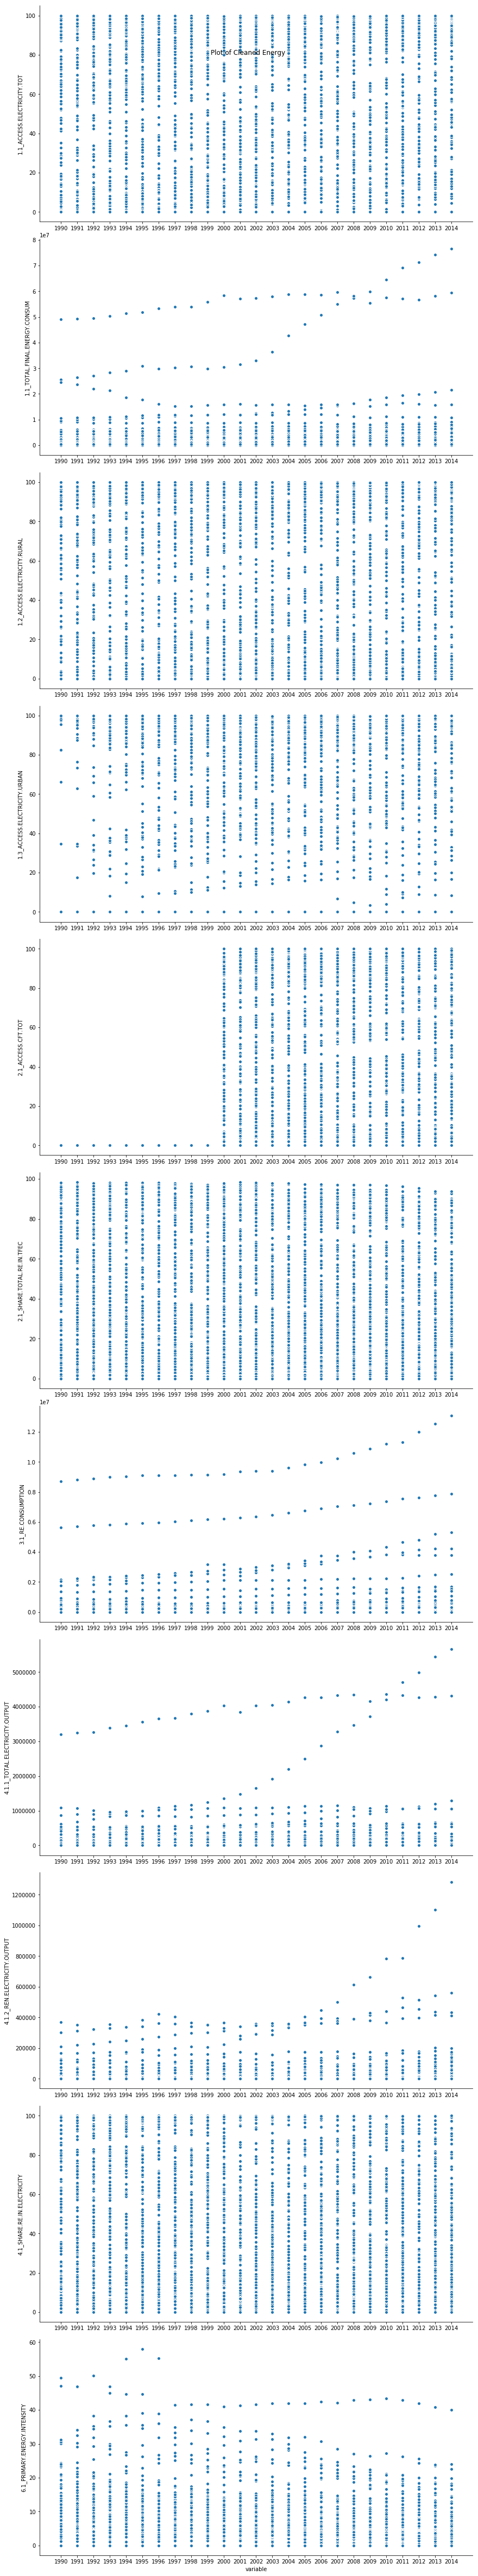

In [192]:
sns.pairplot(
    cleanedenergydata_nonnull,
    x_vars=['variable'],
    y_vars=['1.1_ACCESS.ELECTRICITY.TOT','1.1_TOTAL.FINAL.ENERGY.CONSUM', '1.2_ACCESS.ELECTRICITY.RURAL',
       '1.3_ACCESS.ELECTRICITY.URBAN', '2.1_ACCESS.CFT.TOT',
       '2.1_SHARE.TOTAL.RE.IN.TFEC', '3.1_RE.CONSUMPTION',
    '4.1.1_TOTAL.ELECTRICITY.OUTPUT', '4.1.2_REN.ELECTRICITY.OUTPUT',
'4.1_SHARE.RE.IN.ELECTRICITY', '6.1_PRIMARY.ENERGY.INTENSITY'], 
    size = 6, 
    aspect = 2
    )
plt.suptitle("Plot of Cleaned Energy")

In [194]:
#Have a single row for each indicator code
#Need to sum for each variable column so data of same year is captured within same row

newcolumns = cleanedenergydata_nonnull.columns.difference(['Indicator_Name', 'Indicator_Code', 'Value'])

In [195]:
cleanedenergydata_nonnull.loc[:,newcolumns].groupby(['Country_Name', 'Country_Code', 'variable']).sum().reset_index()

,Country_Name,Country_Code,variable,1.1_ACCESS.ELECTRICITY.TOT,1.1_TOTAL.FINAL.ENERGY.CONSUM,1.2_ACCESS.ELECTRICITY.RURAL,1.3_ACCESS.ELECTRICITY.URBAN,2.1_ACCESS.CFT.TOT,2.1_SHARE.TOTAL.RE.IN.TFEC,3.1_RE.CONSUMPTION,4.1.1_TOTAL.ELECTRICITY.OUTPUT,4.1.2_REN.ELECTRICITY.OUTPUT,4.1_SHARE.RE.IN.ELECTRICITY,6.1_PRIMARY.ENERGY.INTENSITY
0,Afghanistan,AFG,1990,0.000000,39639.42000,0.000000,0.000000,0.000000,15.924533,6312.392357,1128.0,764.0,67.73,1.884113
1,Afghanistan,AFG,1991,0.000000,37341.42000,0.000000,0.000000,0.000000,17.036443,6361.649837,1015.0,690.0,67.98,1.995913
2,Afghanistan,AFG,1992,0.000000,24683.11000,0.000000,0.000000,0.000000,26.521627,6546.362403,703.0,478.0,67.99,1.332502
3,Afghanistan,AFG,1993,0.000000,25664.46000,0.000000,0.000000,0.000000,30.585669,7849.646736,695.0,475.0,68.35,1.760637
4,Afghanistan,AFG,1994,0.000000,25323.95000,0.000000,0.000000,0.000000,32.796250,8305.305876,687.0,472.0,68.70,2.245613
5,Afghanistan,AFG,1995,0.000000,25008.76000,0.000000,0.000000,0.000000,35.075641,8771.982926,675.0,466.0,69.04,1.485692
6,Afghanistan,AFG,1996,0.000000,24521.55000,0.000000,0.000000,0.000000,37.945749,9304.885874,675.0,475.0,70.37,1.548477
7,Afghanistan,AFG,1997,0.000000,23800.61000,0.000000,0.000000,0.000000,41.432601,9861.211772,670.0,485.0,72.39,1.599237
8,Afghanistan,AFG,1998,0.000000,23255.34000,0.000000,0.000000,0.000000,44.094320,10254.283940,665.0,495.0,74.44,1.648978
9,Afghanistan,AFG,1999,0.016871,20630.12000,0.000000,0.000000,0.000000,52.185770,10765.986910,685.0,505.0,73.72,1.570681


In [196]:
len(cleanedenergydata_nonnull)

71225

In [197]:
groupedenergydata = cleanedenergydata_nonnull.loc[:,newcolumns].groupby(['Country_Name', 'Country_Code', 'variable']).sum().reset_index()

In [198]:
groupedenergydata.head()

,Country_Name,Country_Code,variable,1.1_ACCESS.ELECTRICITY.TOT,1.1_TOTAL.FINAL.ENERGY.CONSUM,1.2_ACCESS.ELECTRICITY.RURAL,1.3_ACCESS.ELECTRICITY.URBAN,2.1_ACCESS.CFT.TOT,2.1_SHARE.TOTAL.RE.IN.TFEC,3.1_RE.CONSUMPTION,4.1.1_TOTAL.ELECTRICITY.OUTPUT,4.1.2_REN.ELECTRICITY.OUTPUT,4.1_SHARE.RE.IN.ELECTRICITY,6.1_PRIMARY.ENERGY.INTENSITY
0,Afghanistan,AFG,1990,0.0,39639.42,0.0,0.0,0.0,15.924533,6312.392357,1128.0,764.0,67.73,1.884113
1,Afghanistan,AFG,1991,0.0,37341.42,0.0,0.0,0.0,17.036443,6361.649837,1015.0,690.0,67.98,1.995913
2,Afghanistan,AFG,1992,0.0,24683.11,0.0,0.0,0.0,26.521627,6546.362403,703.0,478.0,67.99,1.332502
3,Afghanistan,AFG,1993,0.0,25664.46,0.0,0.0,0.0,30.585669,7849.646736,695.0,475.0,68.35,1.760637
4,Afghanistan,AFG,1994,0.0,25323.95,0.0,0.0,0.0,32.796250,8305.305876,687.0,472.0,68.70,2.245613


In [199]:
groupedcolumns = groupedenergydata.iloc[:,4:]

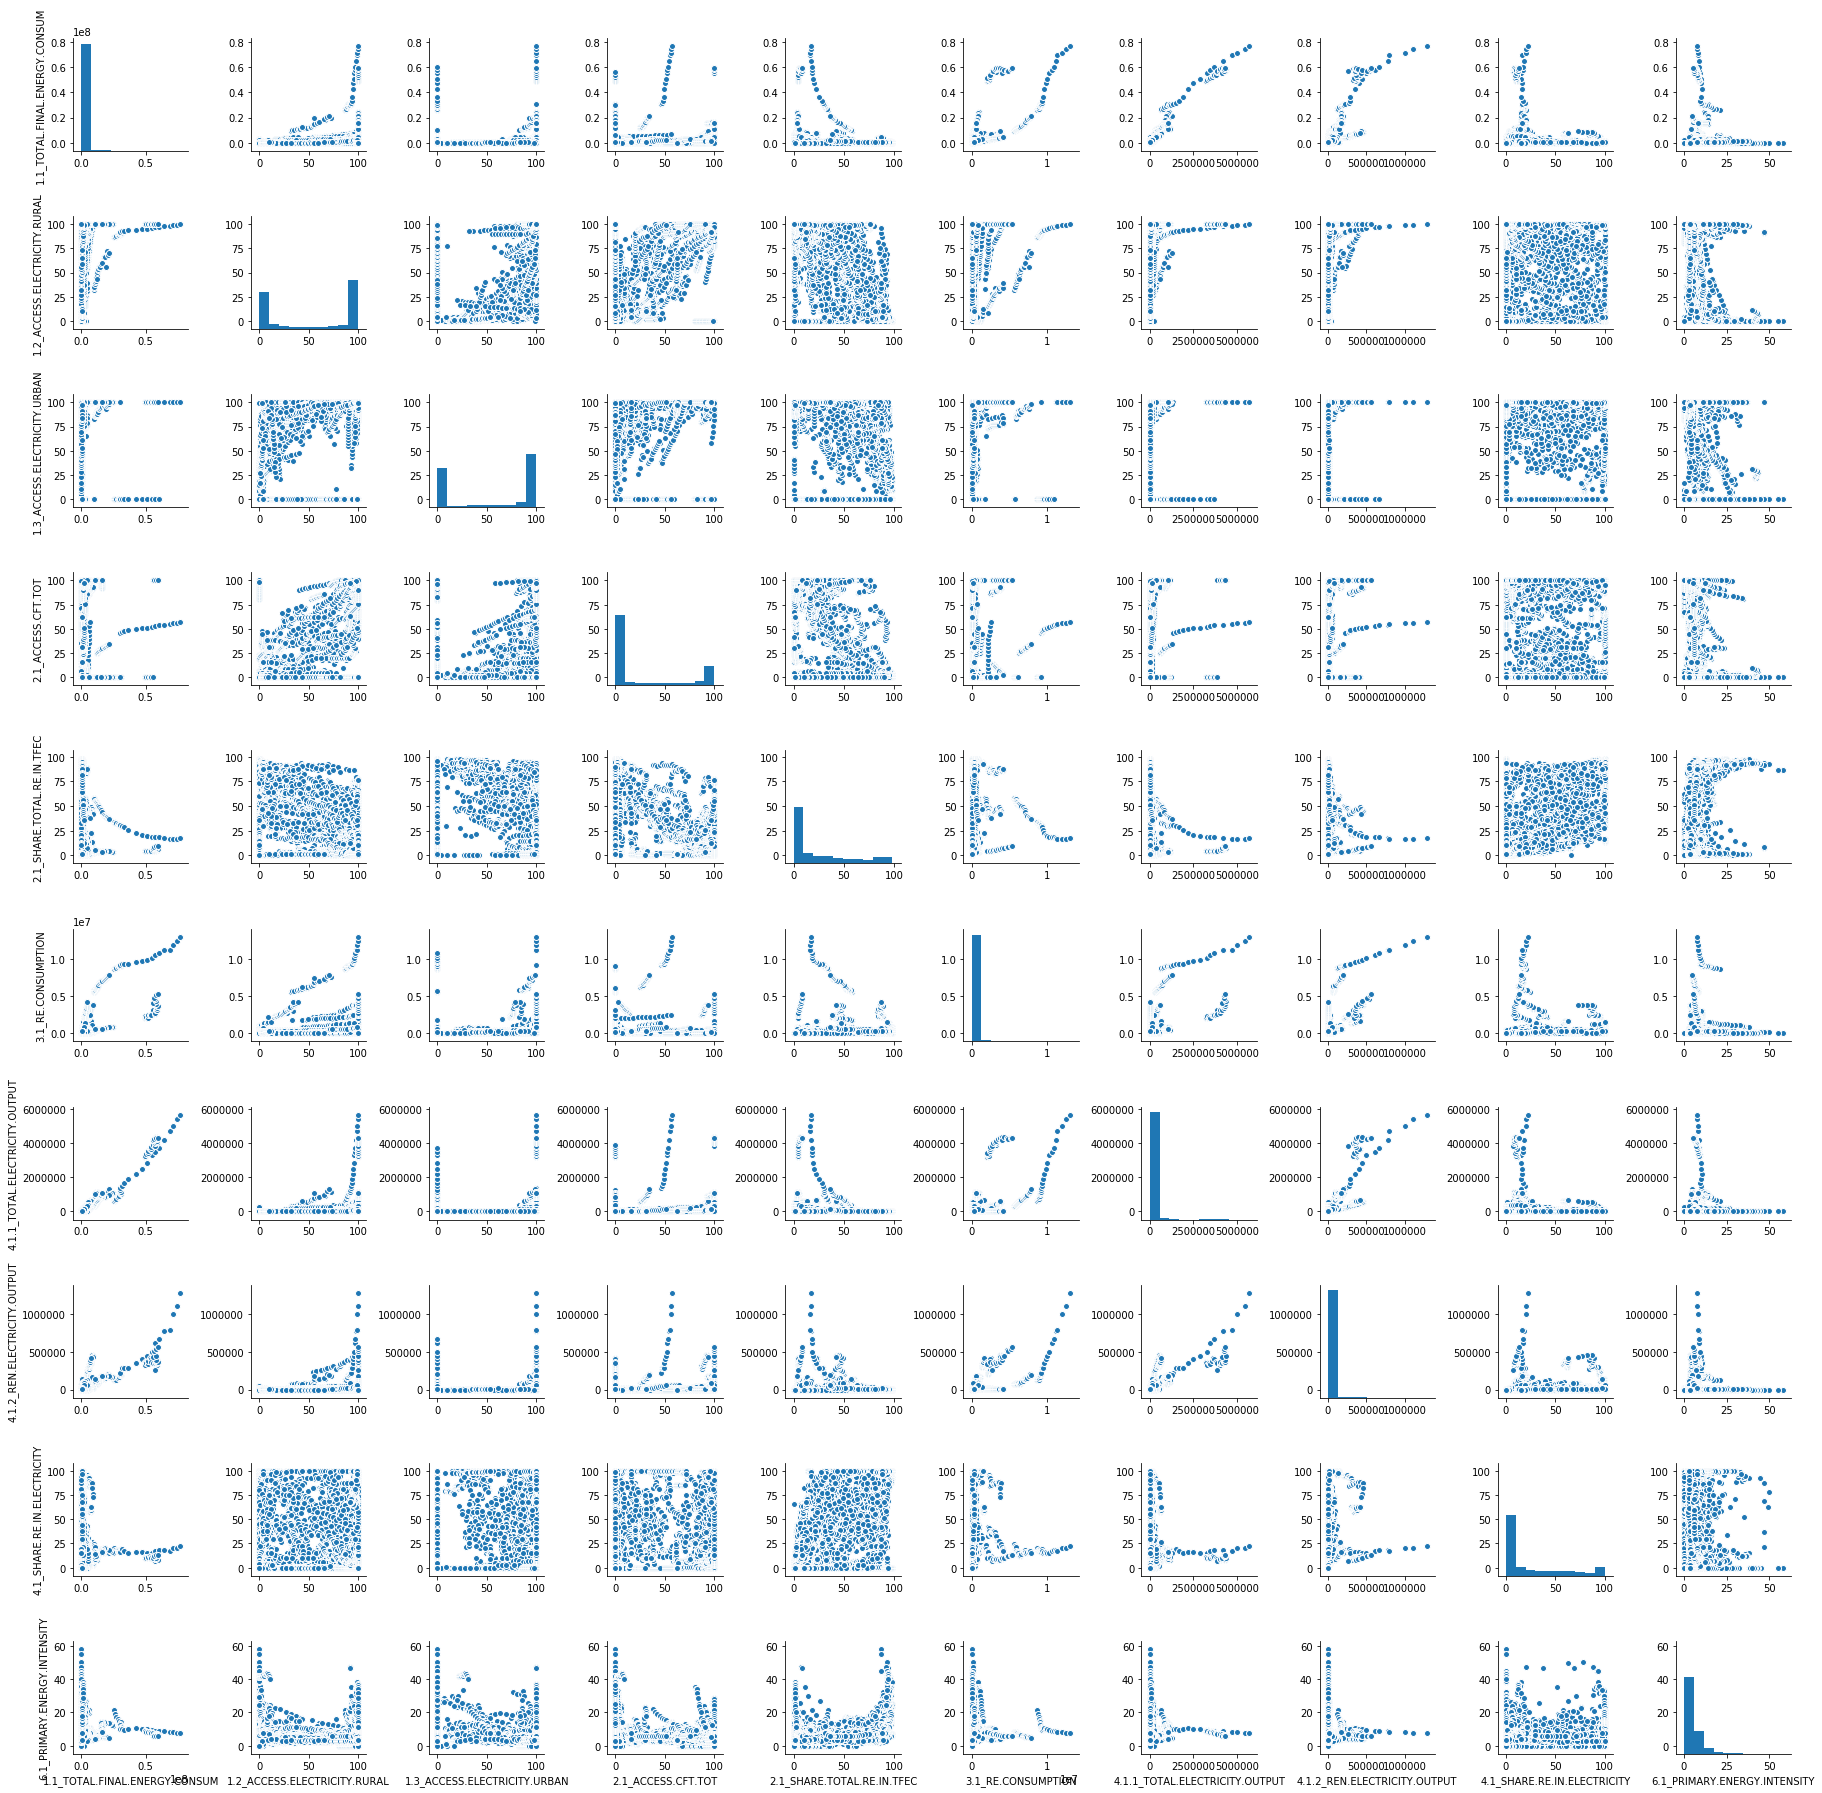

In [200]:
sns.pairplot(groupedcolumns)

In [201]:
auto_correlations = groupedenergydata.corr()
auto_correlations

,1.1_ACCESS.ELECTRICITY.TOT,1.1_TOTAL.FINAL.ENERGY.CONSUM,1.2_ACCESS.ELECTRICITY.RURAL,1.3_ACCESS.ELECTRICITY.URBAN,2.1_ACCESS.CFT.TOT,2.1_SHARE.TOTAL.RE.IN.TFEC,3.1_RE.CONSUMPTION,4.1.1_TOTAL.ELECTRICITY.OUTPUT,4.1.2_REN.ELECTRICITY.OUTPUT,4.1_SHARE.RE.IN.ELECTRICITY,6.1_PRIMARY.ENERGY.INTENSITY
1.1_ACCESS.ELECTRICITY.TOT,1.000000,0.158925,0.936039,0.719085,0.511410,-0.255740,0.087130,0.160668,0.183365,0.027552,0.059022
1.1_TOTAL.FINAL.ENERGY.CONSUM,0.158925,1.000000,0.162690,0.116034,0.125945,-0.051374,0.741122,0.980765,0.815747,-0.027388,0.085533
1.2_ACCESS.ELECTRICITY.RURAL,0.936039,0.162690,1.000000,0.711828,0.473175,-0.327618,0.073969,0.167906,0.181129,-0.028761,0.039970
1.3_ACCESS.ELECTRICITY.URBAN,0.719085,0.116034,0.711828,1.000000,0.477830,-0.055917,0.067021,0.127761,0.150310,0.113624,0.057217
2.1_ACCESS.CFT.TOT,0.511410,0.125945,0.473175,0.477830,1.000000,-0.158332,0.043566,0.147864,0.162606,0.026214,0.039265
2.1_SHARE.TOTAL.RE.IN.TFEC,-0.255740,-0.051374,-0.327618,-0.055917,-0.158332,1.000000,0.120563,-0.072244,-0.000870,0.641942,0.453043
3.1_RE.CONSUMPTION,0.087130,0.741122,0.073969,0.067021,0.043566,0.120563,1.000000,0.645977,0.707584,0.075304,0.112936
4.1.1_TOTAL.ELECTRICITY.OUTPUT,0.160668,0.980765,0.167906,0.127761,0.147864,-0.072244,0.645977,1.000000,0.825152,-0.030996,0.060768
4.1.2_REN.ELECTRICITY.OUTPUT,0.183365,0.815747,0.181129,0.150310,0.162606,-0.000870,0.707584,0.825152,1.000000,0.124019,0.059835
4.1_SHARE.RE.IN.ELECTRICITY,0.027552,-0.027388,-0.028761,0.113624,0.026214,0.641942,0.075304,-0.030996,0.124019,1.000000,0.251830


Text(0.5,1,u'Pairwise Feature Correlation')

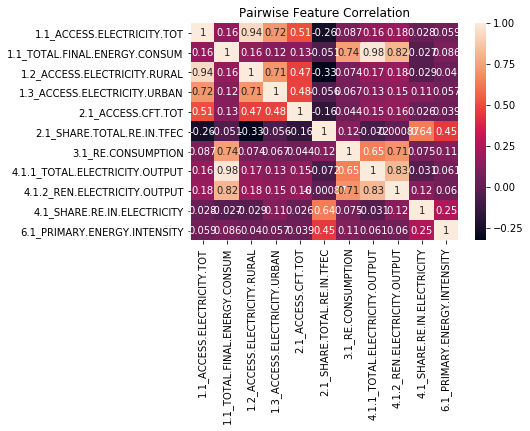

In [202]:
ax = sns.heatmap(auto_correlations,annot=True)
ax.set_title("Pairwise Feature Correlation")

In [203]:
groupedenergydata.columns

Index([u'Country_Name', u'Country_Code', u'variable',
       u'1.1_ACCESS.ELECTRICITY.TOT', u'1.1_TOTAL.FINAL.ENERGY.CONSUM',
       u'1.2_ACCESS.ELECTRICITY.RURAL', u'1.3_ACCESS.ELECTRICITY.URBAN',
       u'2.1_ACCESS.CFT.TOT', u'2.1_SHARE.TOTAL.RE.IN.TFEC',
       u'3.1_RE.CONSUMPTION', u'4.1.1_TOTAL.ELECTRICITY.OUTPUT',
       u'4.1.2_REN.ELECTRICITY.OUTPUT', u'4.1_SHARE.RE.IN.ELECTRICITY',
       u'6.1_PRIMARY.ENERGY.INTENSITY'],
      dtype='object')

In [204]:
# Checking number of entries per year in my groupby
YearGroups = groupedenergydata.groupby('variable')
YearGroups.size()

variable
1990    259
1991    259
1992    259
1993    259
1994    259
1995    259
1996    259
1997    259
1998    259
1999    259
2000    259
2001    259
2002    259
2003    259
2004    259
2005    259
2006    259
2007    259
2008    259
2009    259
2010    259
2011    259
2012    259
2013    259
2014    259
dtype: int64

In [262]:
#Looking at Overall % Access to Electricity
#And % of Total Final Energy Consumption that is Renewable

averageelectricity = YearGroups['1.1_ACCESS.ELECTRICITY.TOT'].agg(np.mean)
averagerenewable = YearGroups['2.1_SHARE.TOTAL.RE.IN.TFEC'].agg(np.mean)

In [263]:
YearGroups.describe()

1.1_ACCESS.ELECTRICITY.TOT                                        \
                              count       mean        std  min        25%   
variable                                                                    
1990                          259.0  53.565726  43.472966  0.0   0.000000   
1991                          259.0  53.948036  43.407053  0.0   0.069809   
1992                          259.0  54.470073  43.342817  0.0   0.426460   
1993                          259.0  54.859890  43.275008  0.0   0.892189   
1994                          259.0  55.638852  43.141833  0.0   2.590256   
1995                          259.0  57.598640  42.767614  0.0   5.326110   
1996                          259.0  58.155693  42.616045  0.0   6.551874   
1997                          259.0  58.593926  42.529785  0.0   6.797413   
1998                          259.0  59.107729  42.379336  0.0   7.672039   
1999                          259.0  59.590963  42.293209  0.0   7.946251   
2000                          259.0  60.366564  42.138616  0.0   9.688304   
2001                          259.0  61.094423  41.989012  0.0  11.065151   
2002                          259.0  61.966136  41.812047  0.0  13.231057   
2003                          259.0  62.378197  41.708438  0.0  14.023833   
2004                          259.0  63.209088  41.426692  0.0  16.074100   
2005                          259.0  63.654039  41.451398  0.0  15.701243   
2006                          259.0  64.165374  41.359275  0.0  15.733538   
2007                          259.0  65.010645  41.062987  0.0  18.549535   
2008                          259.0  65.470280  41.040137  0.0  20.720057   
2009                          259.0  65.880207  41.005741  0.0  21.129086   
2010                          259.0  66.326841  40.942919  0.0  21.931906   
2011                          259.0  66.895919  40.792065  0.0  23.287201   
2012                          259.0  67.347828  40.754311  0.0  24.834736   
2013                          259.0  67.763549  40.719563  0.0  25.666253   
2014                          259.0  68.374808  40.613049  0.0  27.720634   

                                       1.1_TOTAL.FINAL.ENERGY.CONSUM  \
                50%         75%    max                         count   
variable                                                               
1990      65.470306   98.515499  100.0                         259.0   
1991      66.919060   98.642971  100.0                         259.0   
1992      68.680992   98.769993  100.0                         259.0   
1993      70.219055   98.894306  100.0                         259.0   
1994      71.668182   99.242569  100.0                         259.0   
1995      76.995504  100.000000  100.0                         259.0   
1996      77.883000  100.000000  100.0                         259.0   
1997      79.670555  100.000000  100.0                         259.0   
1998      80.940000  100.000000  100.0                         259.0   
1999      80.788353  100.000000  100.0                         259.0   
2000      82.230743  100.000000  100.0                         259.0   
2001      84.663597  100.000000  100.0                         259.0   
2002      86.681291  100.000000  100.0                         259.0   
2003      87.387314  100.000000  100.0                         259.0   
2004      88.119087  100.000000  100.0                         259.0   
2005      88.753845  100.000000  100.0                         259.0   
2006      89.851433  100.000000  100.0                         259.0   
2007      91.100000  100.000000  100.0                         259.0   
2008      92.000000  100.000000  100.0                         259.0   
2009      93.286415  100.000000  100.0                         259.0   
2010      93.811119  100.000000  100.0                         259.0   
2011      94.552014  100.000000  100.0                         259.0   
2012      95.261185  100.000000  100.0              

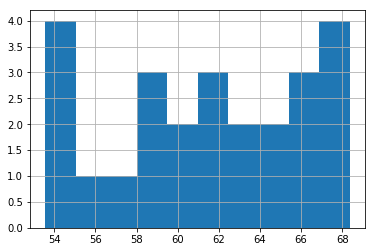

In [264]:
averageelectricity.hist()

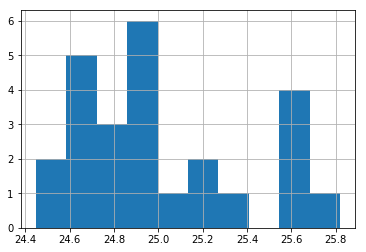

In [265]:
averagerenewable.hist()

Text(0,0.5,u'Percentage')

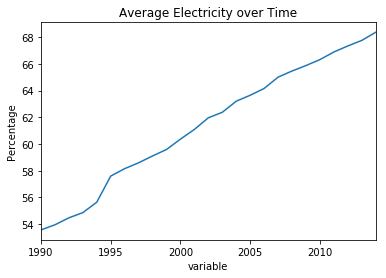

In [266]:
# Plot Total Access over time

ax_1 = averageelectricity.plot (title = "Average Electricity over Time")
ax_1.set_ylabel ("Percentage")

Text(0,0.5,u'Percentage')

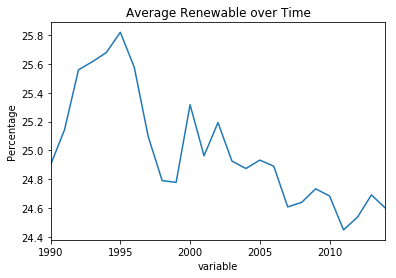

In [268]:
# Plot Renewable over time

ax_2 = averagerenewable.plot (title = "Average Renewable over Time")
ax_2.set_ylabel ("Percentage")

In [269]:
averageelectricity.head()

variable
1990    53.565726
1991    53.948036
1992    54.470073
1993    54.859890
1994    55.638852
Name: 1.1_ACCESS.ELECTRICITY.TOT, dtype: float64

In [270]:
averagerenewable.head()

variable
1990    24.898137
1991    25.142780
1992    25.559084
1993    25.615897
1994    25.679437
Name: 2.1_SHARE.TOTAL.RE.IN.TFEC, dtype: float64

In [271]:
#Graph does not look right - why is it going down?

averagerenewable.tail()

variable
2010    24.682606
2011    24.446923
2012    24.535847
2013    24.690049
2014    24.598376
Name: 2.1_SHARE.TOTAL.RE.IN.TFEC, dtype: float64

In [272]:
groupedenergydata.head()

,Country_Name,Country_Code,variable,1.1_ACCESS.ELECTRICITY.TOT,1.1_TOTAL.FINAL.ENERGY.CONSUM,1.2_ACCESS.ELECTRICITY.RURAL,1.3_ACCESS.ELECTRICITY.URBAN,2.1_ACCESS.CFT.TOT,2.1_SHARE.TOTAL.RE.IN.TFEC,3.1_RE.CONSUMPTION,4.1.1_TOTAL.ELECTRICITY.OUTPUT,4.1.2_REN.ELECTRICITY.OUTPUT,4.1_SHARE.RE.IN.ELECTRICITY,6.1_PRIMARY.ENERGY.INTENSITY
0,Afghanistan,AFG,1990,0.0,39639.42,0.0,0.0,0.0,15.924533,6312.392357,1128.0,764.0,67.73,1.884113
1,Afghanistan,AFG,1991,0.0,37341.42,0.0,0.0,0.0,17.036443,6361.649837,1015.0,690.0,67.98,1.995913
2,Afghanistan,AFG,1992,0.0,24683.11,0.0,0.0,0.0,26.521627,6546.362403,703.0,478.0,67.99,1.332502
3,Afghanistan,AFG,1993,0.0,25664.46,0.0,0.0,0.0,30.585669,7849.646736,695.0,475.0,68.35,1.760637
4,Afghanistan,AFG,1994,0.0,25323.95,0.0,0.0,0.0,32.796250,8305.305876,687.0,472.0,68.70,2.245613


Text(0.5,0.98,u'Renewable % of Total Final Energy Consumption vs. Percent Access to Energy')

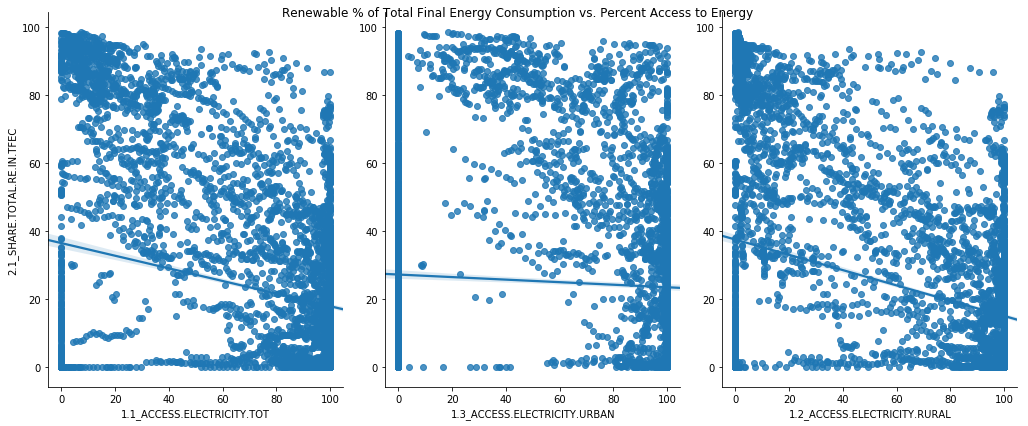

In [273]:
#Does this make sense?  

sns.pairplot(
    groupedenergydata,
    x_vars = ['1.1_ACCESS.ELECTRICITY.TOT','1.3_ACCESS.ELECTRICITY.URBAN','1.2_ACCESS.ELECTRICITY.RURAL'],
    y_vars = '2.1_SHARE.TOTAL.RE.IN.TFEC',
    size = 6,
    aspect = 0.8,
    kind = 'reg')
plt.suptitle("Renewable % of Total Final Energy Consumption vs. Percent Access to Energy")


In [274]:
#Linear Regression model on overall access to electricity

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

#First, create X and Y
feature_cols = ['1.1_ACCESS.ELECTRICITY.TOT']# '1.2_ACCESS.ELECTRICITY.RURAL', '1.3_ACCESS.ELECTRICITY.URBAN']

X = groupedenergydata[feature_cols]
Y = groupedenergydata['2.1_SHARE.TOTAL.RE.IN.TFEC']

#fit model
access_linreg = LinearRegression()
access_linreg.fit(X,Y)

#print coefficients
print ("The y intercept:", access_linreg.intercept_)
print ("The single coefficient:", access_linreg.coef_)



The y intercept: 36.3866957757
The single coefficient: [-0.18541334]


In [275]:
# Calculate R-Squared

print ("This is a terrible R-squared value:")
stats.pearsonr(X.values.flatten(),Y.values)[0]**2



This is a terrible R-squared value:


0.065402942967365638

In [276]:
#Can I increase my R-squared with multiple linear regression?

mult_feature_cols = ['1.1_ACCESS.ELECTRICITY.TOT','1.2_ACCESS.ELECTRICITY.RURAL', '1.3_ACCESS.ELECTRICITY.URBAN']

X_mult = groupedenergydata[mult_feature_cols]
Y_mult = groupedenergydata['2.1_SHARE.TOTAL.RE.IN.TFEC']

#fit model
access_linreg_mult = LinearRegression()
access_linreg_mult.fit(X_mult,Y_mult)

#print coefficients
print ("The y intercept:", access_linreg_mult.intercept_)
print ("Multiple coefficients:", access_linreg_mult.coef_)

#Pair with feature names
list(zip(mult_feature_cols,access_linreg_mult.coef_))

The y intercept: 31.2023704083
Multiple coefficients: [ 0.19601187 -0.55889924  0.22077725]


[('1.1_ACCESS.ELECTRICITY.TOT', 0.19601187480797283),
 ('1.2_ACCESS.ELECTRICITY.RURAL', -0.55889923902920891),
 ('1.3_ACCESS.ELECTRICITY.URBAN', 0.22077725297121029)]

In [277]:
# New R-Squared

print("My new R-Squared is better but still horrible:")

Y_mult_pred = access_linreg_mult.predict(X_mult)
metrics.r2_score(Y_mult, Y_mult_pred)



My new R-Squared is better but still horrible:


0.17968951962891189

In [278]:
#Train/Test Split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_mult, Y_mult, test_size =0.7, random_state = 1234)
print ("Training data size:", X_Train.shape)
print ("Testing data size:", X_Test.shape)

Training data size: (1942, 3)
Testing data size: (4533, 3)


In [279]:
#Train on training data
access_linreg_mult2 = LinearRegression()
access_linreg_mult2.fit(X_Train,Y_Train)

#generate predictions on training set
Y_Pred_Train = access_linreg_mult2.predict(X_Train)
print("Training RMSE:", np.sqrt(metrics.mean_squared_error(Y_Train, Y_Pred_Train)))

#generate predictions on testing set
Y_Pred_Test = access_linreg_mult2.predict(X_Test)
print("Test RMSE:", np.sqrt(metrics.mean_squared_error(Y_Test, Y_Pred_Test))) #This should be higher


Training RMSE: 27.1662181925
Test RMSE: 27.9100293143


In [280]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO
import os

from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [281]:
decision_tree = DecisionTreeRegressor(max_depth =2)
decision_tree.fit(X_Train, Y_Train)
print ("Decision Tree RMSE:", np.sqrt(mean_squared_error(Y_Test, decision_tree.predict(X_Test))))

Decision Tree RMSE: 21.9764203629


In [283]:
#Use Graph Viz to visualize - I still can't get this to work!

dot_data = StringIO()
export_graphviz(
    decision_tree,
    out_file=dot_data,
    feature_names=X_Train.columns.tolist(),
    filled=True,
    rounded=True,
    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [284]:
np.unique(decision_tree.predict(X_Test))

array([  8.63265057,  10.79209375,  17.5039069 ,  55.89623411])

In [285]:
#compute feature importance
pd.DataFrame({
        'feature': mult_feature_cols,
        'importance': decision_tree.feature_importances_    
})

,feature,importance
0,1.1_ACCESS.ELECTRICITY.TOT,0.0
1,1.2_ACCESS.ELECTRICITY.RURAL,1.0
2,1.3_ACCESS.ELECTRICITY.URBAN,0.0


In [286]:
rf = RandomForestRegressor(
    n_estimators = 500, bootstrap = True, oob_score = True, random_state = 123)
rf.fit(X_Train, Y_Train)
Y_Pred_rf = rf.predict(X_Test)
print ("Random Forest RMSE:", np.sqrt(mean_squared_error(Y_Test,Y_Pred_rf)))

Random Forest RMSE: 18.2319006815


In [287]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [288]:
cross_val_score(rf, cv=10, scoring = 'accuracy').mean()

TypeError: cross_val_score() takes at least 2 arguments (3 given)

In [289]:
rf_grid = RandomForestClassifier(n_estimators=500, random_state=1)
grid = GridSearchCV(rf_grid, cv=10, scoring='accuracy')
grid.fit(X_mult, Y_mult)
grid.cv_results_

TypeError: __init__() takes at least 3 arguments (4 given)